# 08 Graphs
__Math 3080: Fundamentals of Data Science__

Reading:
* McKinney, Chapter 9 Plotting and Visualization

Outline:
1. Summary of the different plots we can use
2. Overview of MatplotLib
3. Overview of Seaborn
4. Interactive plots
    * Plotly

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')

-----
## 8.3 Seaborn

<AxesSubplot: xlabel='day', ylabel='count'>

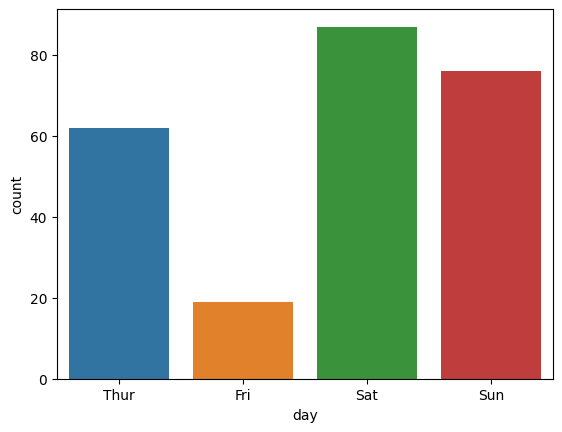

In [3]:
sns.countplot(data=tips, x='day')

Text(0.5, 1.0, 'Number of restaurant visits by gender')

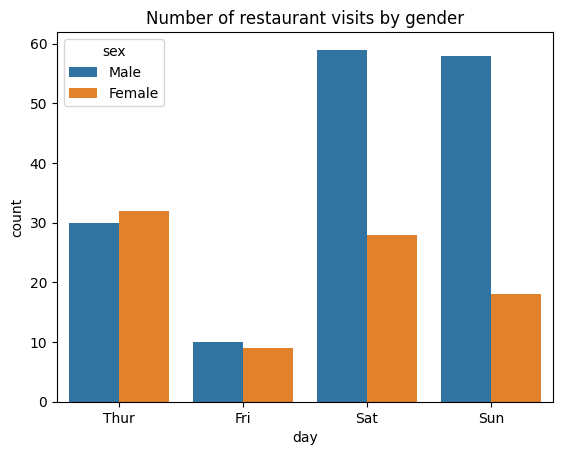

In [4]:
sns.countplot(data=tips, x='day', hue='sex')
plt.title('Number of restaurant visits by gender')

/home/meo/.virtualenvs/DataScience/lib/python3.9/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


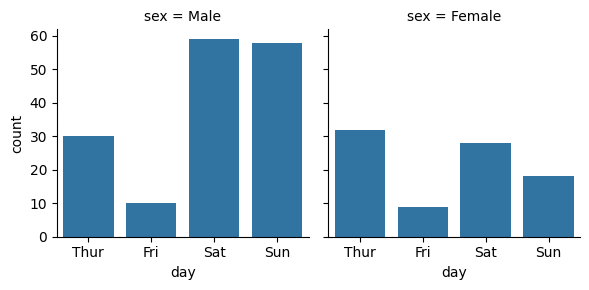

In [7]:
# Multiple Graphs, separated by category
g = sns.FacetGrid(data = tips, col = 'sex')
g.map(sns.countplot, 'day')

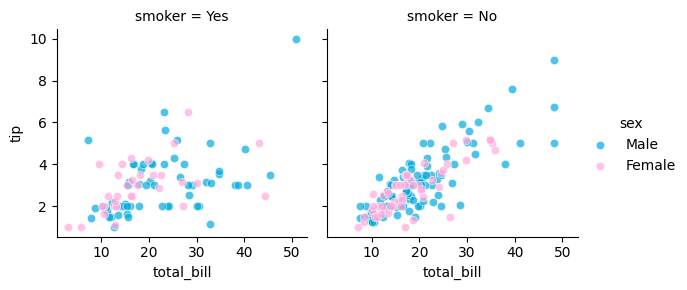

In [17]:
pal = {'Male': '#00aadd', 'Female': '#ffaadd'}
g = sns.FacetGrid(tips, col="smoker", hue="sex", palette=pal)
g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
g.add_legend()

### A note about colors
When choosing colors, it is tempting to choose colors that we like. I have received many figures in assignments where the colors were wild a crazy. Although I have no problem with that (your colors are your own choice), we have to be careful with the colors we choose. Remember that this figure is for others to see, not yourself. So, let's look at a few principles for choosing colors.
* Choose a color scheme that helps specific categories stand out
* With categorical data, choose a scheme where colors vary
* With quantitative data, choose a scheme with a gradual change
* Choose a color scheme that works for colorblindness

A summary of good color choice practices can be found here:
* https://seaborn.pydata.org/tutorial/color_palettes.html

### Quantitative and Distribution Plots
* Histograms
  * can include KDE plots (will be discussed later)
* Scatter Plots
  * Regression Plots
* Rugplot
  * KDE plots (kernel density estimation)
* 2D KDE plots
* Boxplot, Violinplot, Stripplot, swarmplot
* Heatmap and Clustermap

### Categorical Plots
* Barplot and Countplot


### Multiple Plots
* Jointplot (Scatter with Histogram)
* Pairplot (diagonal is histogram, others are scatterplots)